<a href="https://colab.research.google.com/github/nikhilreganti/Real-Estate-Price-Predictor/blob/main/real_estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mt

In [ ]:
dataset = pd.read_csv('Real estate.csv')
dataset

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
dataset = dataset.drop(['No'],axis = 1)

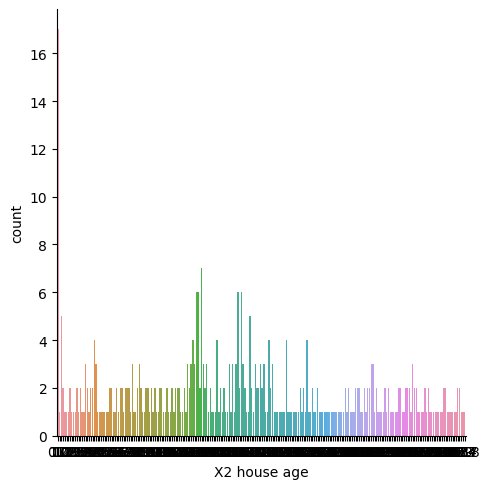

In [ ]:
import seaborn as sns
sns.catplot(x = 'X2 house age',kind = 'count',data=dataset)

In [ ]:
dict = {'X1 transaction date': 'date',
        'X2 house age': 'house_age',
        'X3 distance to the nearest MRT station': 'dist_metro',
        'X4 number of convenience stores':'stores_near',
        'X5 latitude':'latitude',
        'X6 longitude':'longitude',
        'Y house price of unit area':'house_price'}

In [ ]:
dataset.rename(columns=dict,
          inplace=True)
dataset

,date,house_age,dist_metro,stores_near,latitude,longitude,house_price
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


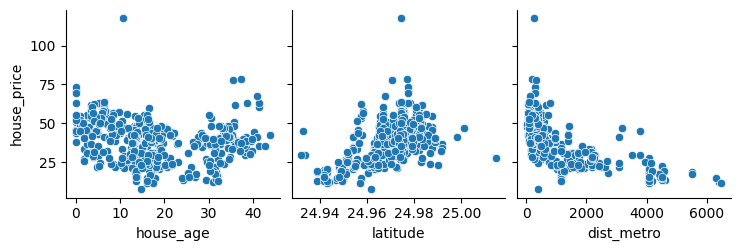

In [ ]:
sns.pairplot(dataset,x_vars = ['house_age','latitude','dist_metro'],y_vars = 'house_price',kind = 'scatter')

In [ ]:
dataset['house_age'] = (dataset['house_age'] - dataset['house_age'].min())/(dataset['house_age'].max() - dataset['house_age'].min())
dataset['dist_metro'] = (dataset['dist_metro'] - dataset['dist_metro'].min())/(dataset['dist_metro'].max() - dataset['dist_metro'].min())
dataset['latitude'] = (dataset['latitude'] - dataset['latitude'].min())/(dataset['latitude'].max() - dataset['latitude'].min())
dataset['stores_near'] = (dataset['stores_near'] - dataset['stores_near'].min())/(dataset['stores_near'].max() - dataset['stores_near'].min())
dataset['longitude'] = (dataset['longitude'] - dataset['longitude'].min())/(dataset['longitude'].max() - dataset['longitude'].min())
dataset['house_price'] = (dataset['house_price'] - dataset['house_price'].min())/(dataset['house_price'].max() - dataset['house_price'].min())
dataset

,date,house_age,dist_metro,stores_near,latitude,longitude,house_price
0,2012.917,0.730594,0.009513,1.0,0.616941,0.719323,0.275705
1,2012.917,0.445205,0.043809,0.9,0.584949,0.711451,0.314832
2,2013.583,0.303653,0.083315,0.5,0.671231,0.758896,0.361237
3,2013.500,0.303653,0.083315,0.5,0.671231,0.758896,0.429481
4,2012.833,0.114155,0.056799,0.5,0.573194,0.743153,0.323021
...,...,...,...,...,...,...,...
409,2013.000,0.312785,0.627820,0.0,0.114881,0.326504,0.070974
410,2012.667,0.127854,0.010375,0.9,0.512118,0.750162,0.385805
411,2013.250,0.429224,0.056861,0.7,0.571498,0.715225,0.300273
412,2013.000,0.184932,0.012596,0.5,0.420141,0.723959,0.408553


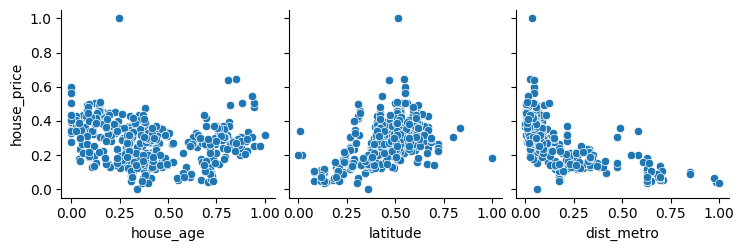

In [ ]:
sns.pairplot(dataset,x_vars = ['house_age','latitude','dist_metro'],y_vars = 'house_price',kind = 'scatter')

prediction of data using random forest

In [ ]:
x = dataset.iloc[:,[0,1,2,3]].values
y = dataset.iloc[:, -1].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 75, seed = 12)
xgb_r.fit(X_train, y_train)
pred = xgb_r.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

[03:15:28] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  0.066865


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.6891141672683481

outliers modification

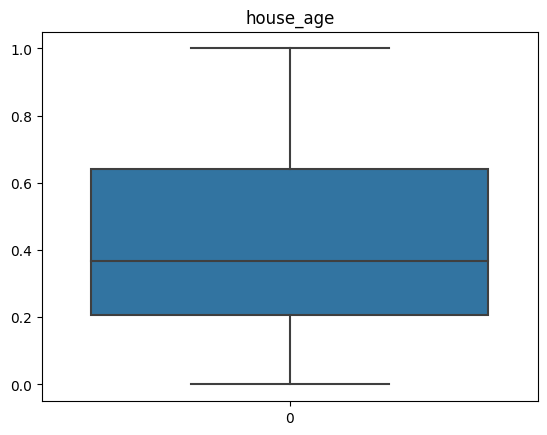

In [ ]:
sns.boxplot(dataset['house_age'])
mt.title('house_age')
mt.show()

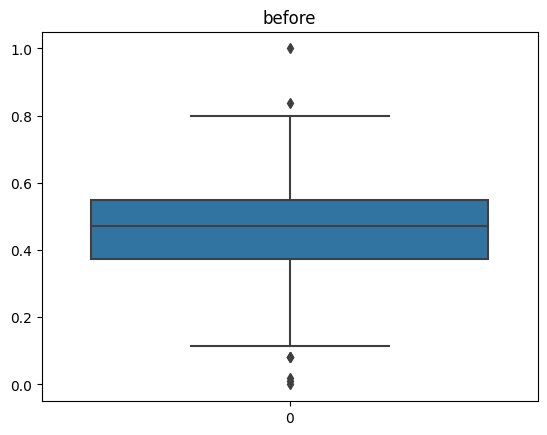

In [ ]:
sns.boxplot(dataset['latitude'])
mt.title('before')
mt.show()

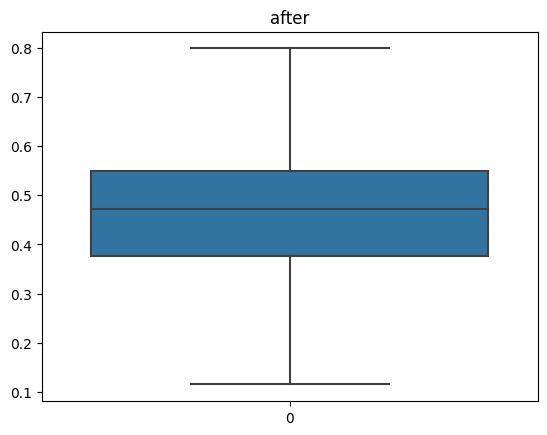

In [ ]:
for i in dataset['latitude']:
  q1 = dataset['latitude'].quantile(0.25)
  q2 = dataset['latitude'].quantile(0.75)
  iqr = q2-q1
  lower_l = q1 - 1.5*iqr
  upper_l = q2 + 1.5*iqr
  if i<lower_l or i>upper_l:
    dataset['latitude'] = dataset['latitude'].replace(i,np.median(dataset['latitude']))
sns.boxplot(dataset['latitude'])
mt.title('after')
mt.show()

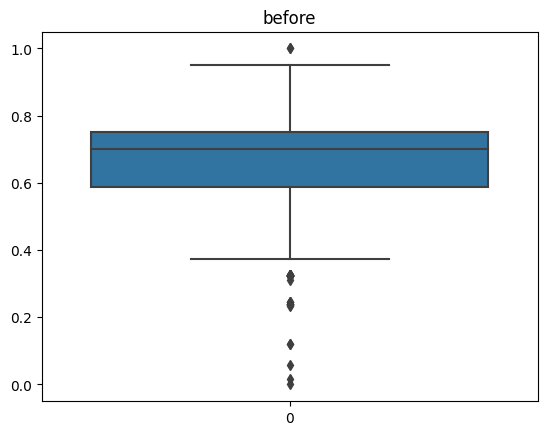

In [ ]:
sns.boxplot(dataset['longitude'])
mt.title('before')
mt.show()

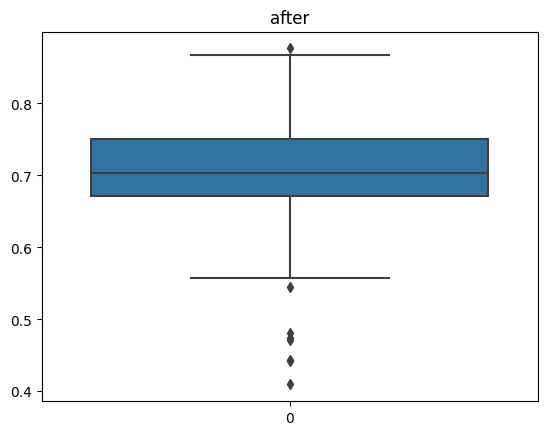

In [ ]:
for i in dataset['longitude']:
  q1 = dataset['longitude'].quantile(0.25)
  q2 = dataset['longitude'].quantile(0.75)
  iqr = q2-q1
  lower_l = q1 - 1.5*iqr
  upper_l = q2 + 1.5*iqr
  if i<lower_l or i>upper_l:
    dataset['longitude'] = dataset['longitude'].replace(i,np.mean(dataset['longitude']))
sns.boxplot(dataset['longitude'])
mt.title('after')
mt.show()

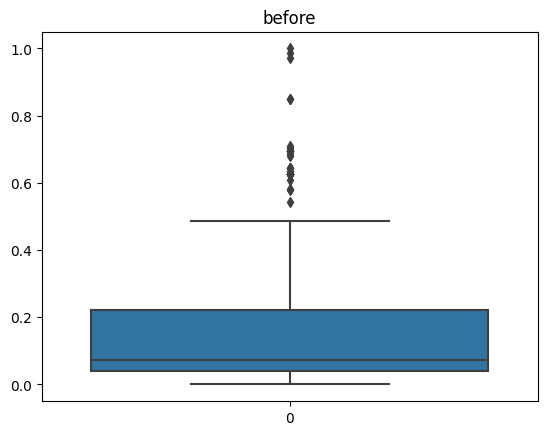

In [ ]:
sns.boxplot(dataset['dist_metro'])
mt.title('before')
mt.show()

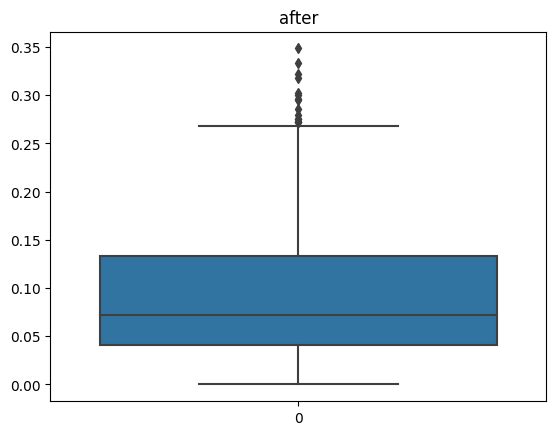

In [ ]:
for i in dataset['dist_metro']:
  q1 = dataset['dist_metro'].quantile(0.25)
  q2 = dataset['dist_metro'].quantile(0.75)
  iqr = q2-q1
  lower_l = q1 - 1.5*iqr
  upper_l = q2 + 1.5*iqr
  if i<lower_l or i>upper_l:
    dataset['dist_metro'] = dataset['dist_metro'].replace(i,np.mean(dataset['dist_metro']))
sns.boxplot(dataset['dist_metro'])
mt.title('after')
mt.show()

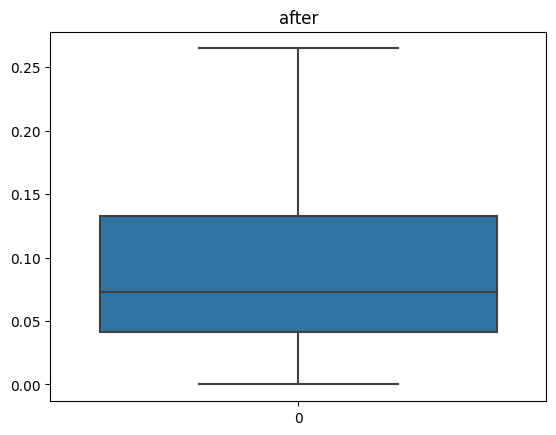

In [ ]:
for i in (dataset['dist_metro']):
  if i>0.265:
    dataset['dist_metro'] = dataset['dist_metro'].replace(i,0.26)
sns.boxplot(dataset['dist_metro'])
mt.title('after')
mt.show()

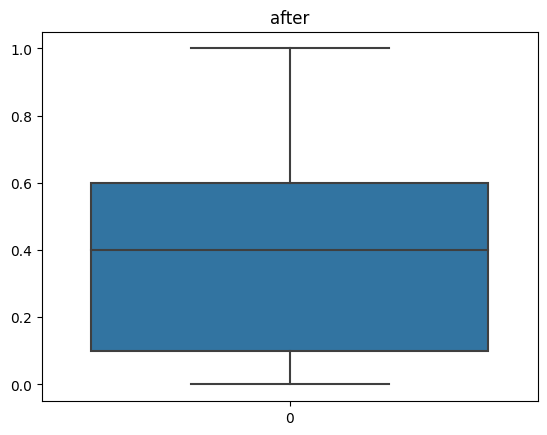

In [ ]:
sns.boxplot(dataset['stores_near'])
mt.title('after')
mt.show()

In [ ]:
dataset = dataset.drop(['date'],axis =1)

In [ ]:
dataset.corr()

,house_age,dist_metro,stores_near,latitude,longitude,house_price
house_age,1.000000,0.016705,0.049593,0.054314,-0.058125,-0.210567
dist_metro,0.016705,1.000000,-0.603173,-0.315314,-0.191352,-0.634576
stores_near,0.049593,-0.603173,1.000000,0.442137,0.332800,0.571005
latitude,0.054314,-0.315314,0.442137,1.000000,0.057934,0.559182
longitude,-0.058125,-0.191352,0.332800,0.057934,1.000000,0.223706
house_price,-0.210567,-0.634576,0.571005,0.559182,0.223706,1.000000


longitude doesn't have good correlation with house price hence discarding that for final model

In [ ]:
x = dataset.iloc[:,[0,1,2,3]].values
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.34 0.34]
 [0.12 0.06]
 [0.32 0.35]
 [0.1  0.07]
 [0.33 0.39]
 [0.28 0.28]
 [0.29 0.37]
 [0.25 0.31]
 [0.38 0.4 ]
 [0.35 0.3 ]
 [0.34 0.31]
 [0.28 0.32]
 [0.34 0.19]
 [0.3  0.29]
 [0.39 0.42]
 [0.26 0.27]
 [0.28 0.3 ]
 [0.35 0.43]
 [0.29 0.29]
 [0.34 0.33]
 [0.42 0.42]
 [0.12 0.16]
 [0.29 0.14]
 [0.38 0.4 ]
 [0.37 0.34]
 [0.32 0.24]
 [0.32 0.22]
 [0.09 0.17]
 [0.38 0.38]
 [0.2  0.16]
 [0.3  0.4 ]
 [0.2  0.2 ]
 [0.36 0.34]
 [0.28 0.39]
 [0.32 0.17]
 [0.12 0.2 ]
 [0.39 0.35]
 [0.21 0.19]
 [0.43 0.43]
 [0.19 0.07]
 [0.38 0.34]
 [0.25 0.2 ]
 [0.18 0.15]
 [0.39 0.37]
 [0.09 0.08]
 [0.29 0.3 ]
 [0.33 0.3 ]
 [0.11 0.05]
 [0.14 0.12]
 [0.35 0.5 ]
 [0.42 0.51]
 [0.3  0.3 ]
 [0.39 0.31]
 [0.06 0.1 ]
 [0.12 0.19]
 [0.24 0.19]
 [0.39 0.48]
 [0.3  0.27]
 [0.34 0.29]
 [0.2  0.19]
 [0.3  0.32]
 [0.33 0.33]
 [0.31 0.32]
 [0.38 0.45]
 [0.29 0.31]
 [0.22 0.16]
 [0.11 0.05]
 [0.16 0.18]
 [0.39 0.44]
 [0.28 0.28]
 [0.18 0.12]
 [0.38 0.32]
 [0.34 0.64]
 [0.13 0.12]
 [0.32 0.23]
 [0.26 0.23]
 [0.27 0.22]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6823157923796672

In [ ]:
from sklearn.metrics import mean_squared_error as MSE
rmse = np.sqrt(MSE(y_test, y_pred))
rmse

0.067592544543303

random forest regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 75, random_state = 1)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=75, random_state=1)

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.42 0.34]
 [0.1  0.06]
 [0.37 0.35]
 [0.12 0.07]
 [0.24 0.39]
 [0.29 0.28]
 [0.34 0.37]
 [0.27 0.31]
 [0.51 0.4 ]
 [0.31 0.3 ]
 [0.33 0.31]
 [0.14 0.32]
 [0.25 0.19]
 [0.31 0.29]
 [0.47 0.42]
 [0.29 0.27]
 [0.26 0.3 ]
 [0.37 0.43]
 [0.3  0.29]
 [0.31 0.33]
 [0.4  0.42]
 [0.19 0.16]
 [0.26 0.14]
 [0.39 0.4 ]
 [0.43 0.34]
 [0.32 0.24]
 [0.32 0.22]
 [0.17 0.17]
 [0.39 0.38]
 [0.15 0.16]
 [0.34 0.4 ]
 [0.15 0.2 ]
 [0.4  0.34]
 [0.28 0.39]
 [0.32 0.17]
 [0.18 0.2 ]
 [0.36 0.35]
 [0.17 0.19]
 [0.41 0.43]
 [0.12 0.07]
 [0.38 0.34]
 [0.28 0.2 ]
 [0.2  0.15]
 [0.34 0.37]
 [0.08 0.08]
 [0.3  0.3 ]
 [0.3  0.3 ]
 [0.06 0.05]
 [0.19 0.12]
 [0.41 0.5 ]
 [0.48 0.51]
 [0.26 0.3 ]
 [0.43 0.31]
 [0.09 0.1 ]
 [0.19 0.19]
 [0.28 0.19]
 [0.44 0.48]
 [0.28 0.27]
 [0.33 0.29]
 [0.15 0.19]
 [0.27 0.32]
 [0.48 0.33]
 [0.3  0.32]
 [0.4  0.45]
 [0.31 0.31]
 [0.17 0.16]
 [0.12 0.05]
 [0.22 0.18]
 [0.44 0.44]
 [0.29 0.28]
 [0.14 0.12]
 [0.39 0.32]
 [0.41 0.64]
 [0.16 0.12]
 [0.3  0.23]
 [0.2  0.23]
 [0.19 0.22]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7129703835881165

In [ ]:
rmse = np.sqrt(MSE(y_test, y_pred))
rmse

0.06424869903661869

decision tree model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0.46 0.34]
 [0.07 0.06]
 [0.36 0.35]
 [0.13 0.07]
 [0.2  0.39]
 [0.28 0.28]
 [0.3  0.37]
 [0.3  0.31]
 [1.   0.4 ]
 [0.33 0.3 ]
 [0.36 0.31]
 [0.   0.32]
 [0.23 0.19]
 [0.31 0.29]
 [0.51 0.42]
 [0.25 0.27]
 [0.27 0.3 ]
 [0.37 0.43]
 [0.3  0.29]
 [0.36 0.33]
 [0.39 0.42]
 [0.19 0.16]
 [0.35 0.14]
 [0.39 0.4 ]
 [0.45 0.34]
 [0.33 0.24]
 [0.31 0.22]
 [0.15 0.17]
 [0.41 0.38]
 [0.18 0.16]
 [0.31 0.4 ]
 [0.14 0.2 ]
 [0.37 0.34]
 [0.35 0.39]
 [0.31 0.17]
 [0.17 0.2 ]
 [0.36 0.35]
 [0.13 0.19]
 [0.38 0.43]
 [0.03 0.07]
 [0.39 0.34]
 [0.28 0.2 ]
 [0.2  0.15]
 [0.28 0.37]
 [0.1  0.08]
 [0.31 0.3 ]
 [0.27 0.3 ]
 [0.04 0.05]
 [0.19 0.12]
 [0.42 0.5 ]
 [0.48 0.51]
 [0.23 0.3 ]
 [0.35 0.31]
 [0.14 0.1 ]
 [0.19 0.19]
 [0.27 0.19]
 [0.43 0.48]
 [0.28 0.27]
 [0.36 0.29]
 [0.14 0.19]
 [0.23 0.32]
 [0.51 0.33]
 [0.33 0.32]
 [0.37 0.45]
 [0.31 0.31]
 [0.18 0.16]
 [0.14 0.05]
 [0.24 0.18]
 [0.47 0.44]
 [0.28 0.28]
 [0.13 0.12]
 [0.41 0.32]
 [0.64 0.64]
 [0.14 0.12]
 [0.3  0.23]
 [0.2  0.23]
 [0.18 0.22]

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.3339801600234923

different ways to choose the best model

In [ ]:
rmse = np.sqrt(MSE(y_test, y_pred))
rmse

0.09786886822286328

improving accuracy using xgboost

In [ ]:
import xgboost as xg
from sklearn.metrics import mean_squared_error as MSE
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 75, seed = 12)
xgb_r.fit(X_train, y_train)
pred = xgb_r.predict(X_test)
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

[03:15:33] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE :  0.072687


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.632622240502037